### Exploratory Data Analysis
### Data Pre-Processing

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df_matches = pd.read_csv("matches.csv")
df_matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [3]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [4]:
print(df_matches.shape)
print(df_deliveries.shape)

(756, 18)
(179078, 21)




*   In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.
*  Date is also not useful because we already have season column which is also almost equal to date.


*   City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season. But i am removing only venue it almost equal to city feature.
*   'Result' feature is almost equal to 'winner' feature. So i am dropping result column also.





In [5]:
df_matches = df_matches.drop(['venue','date','result','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith


In [6]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64


In [7]:
#In 2019 delhi daredevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

#Rising pune supergiants name also printed in two ways. Lets change it to Rising pune supergiants.
df_matches = df_matches.replace(to_replace ="Rising Pune Supergiant", value = "Rising Pune Supergiants") 

df_deliveries = df_deliveries.replace(to_replace = "Rising Pune Supergiant", value = "Rising Pune Supergiants")

In [8]:
#checking null values in matches dataset
print(df_matches.isnull().sum())

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64


In [9]:
#printing null rows in matches dataset
df1_null = df_matches[df_matches.isna().any(axis=1)]
df1_null.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,0,NaN,0,0,NaN
461,462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,7,PA Patel


In [10]:
#After seeing above table we can clearly understood that 4 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)
#city column also has 7 null values. I checked those matches data in Espn website and they played in Dubai.
df_matches["city"].fillna("Dubai", inplace = True)
print(df_matches.shape)

(756, 12)


In [11]:
#checking null values in deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64




*   Player_dismissed, dismissal_kind and fielder features are having null values. But if you consider today questions only 'player_dismissed' and 'dismissal_kind' features are useful for today analysis. So i am removing "fielder" feature.
*   Filling player_dismissed null values with 'No wicket', dismissal_Kind null values with also No Wicket.



In [12]:
#dropping fielder column
df_deliveries = df_deliveries.drop(['fielder'], axis = 1) 
#filling null values
df_deliveries["player_dismissed"].fillna("No Wicket", inplace = True)
df_deliveries["dismissal_kind"].fillna("No Wicket", inplace = True)
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket


In [13]:
# list of dtypes to include 
include =['float', 'int']
desc = df_deliveries.describe(include = include)
desc

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000




*   I think there are no outliers present in overs column but in balls column balls range is between(0-9), it happens if bowlers balls extra deliveries.
*   In innings column maximum value is 5 so there are some outliers presented. Because there are 2 innings per match, if match tied then they will conduct one super over till last season. So maximum number of innings is 4.


*   And in remaining columns max value is in certain limit only. So i can say there are not much outliers.






In [57]:
#Merging both datasets

df_total = pd.merge(df_matches, df_deliveries, how= 'outer', left_on='id',right_on='match_id')

### Q1) Who will win today match MI vs RCB?

In [184]:
# Lets check winning ratio between RCB VS MI
df_RCB_MI = df_matches[((df_matches['team1'] == 'Royal Challengers Bangalore') | (df_matches['team1'] == 'Mumbai Indians')) & 
                        ((df_matches['team2'] == 'Royal Challengers Bangalore') | (df_matches['team2'] == 'Mumbai Indians'))] 

#plotting RCB and MI wins against each other
import plotly.graph_objs as go
df_winner = df_RCB_MI[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)[:2]

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of wins by RCB and MI against each other',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show() 

In [187]:
#Lets look at how many player of the match awards won by current MI and RCB players.
#Note: I am taking top 7 palyers from both teams not taking rohit because he is not played in last match. I think this match also he will take rest.
#Sometimes team win dependent on Number of match winners in your team. i.e why i am using this approach.
#Note: I am taking these player names because these players are played atleast one match for their respective sides in this season till now.
df_man_of_match_MI = df_matches[(df_matches['player_of_match'] == 'AS Yadav') | (df_matches['player_of_match'] == 'Q de Kock') |
                                (df_matches['player_of_match'] == 'HH Pandya') | (df_matches['player_of_match'] == 'KA Pollard	') |
                                (df_matches['player_of_match'] == 'JJ Bumrah') | (df_matches['player_of_match'] == 'TA Boult') |
                                (df_matches['player_of_match'] == 'RD Chahar') ]


print("Total number of man of matches won by present Mumbai players is", df_man_of_match_MI.shape[0],"\n") 

df_man_of_match_RCB = df_matches[(df_matches['player_of_match'] == 'V Kohli') | (df_matches['player_of_match'] == 'A Finch') |
                                (df_matches['player_of_match'] == 'AB de Villiers') |  (df_matches['player_of_match'] == 'N Saini') |
                                (df_matches['player_of_match'] == 'YS Chahal') | (df_matches['player_of_match'] == 'CH Morris') |
                                (df_matches['player_of_match'] == 'Washington Sundar') ]

print("Total number of man of matches won by present Bangalore players is", df_man_of_match_RCB.shape[0])



Total number of man of matches won by present Mumbai players is 15 

Total number of man of matches won by present Bangalore players is 36


**Conclusion :-**



1.   In head-head matches MI won more matches but ipl team will change every 2 years. So team win dependent on in individual players performance.
2.   RCB players won more man of the match awards than MI. So i can say RCB has more match winners than MI.

So i am predicting RCB will win today match.



### Q2) How many bowlers in the match from both the teams, will get 2 or more wickets?

Wickets fall in  a match depends on bowler and pitch. Suppose if you take Chinnaswami it is batting paradise but if you take mohali the ground is very big, So batsman play big shots and getout.

Because of above resons i am choosing below approach to tackle this question. 

In [62]:
#Calculating bowlers wickets in abudhabi ground(Today match is at abudhabi)
df_abudhabi = df_total[(df_total['city'] == 'Abu Dhabi')]
df_bowlers_wickets = df_abudhabi[(df_abudhabi['player_dismissed'] != 'No Wicket') & (df_abudhabi['dismissal_kind'] != 'run out')]
df_bowlers_wickets.head(2)
#calcualting number of wickets taken by each bowler in each match in abudhabi.
wickets_by_bowler_permatch = df_bowlers_wickets.groupby(['match_id','bowler'])['player_dismissed'].count()
df_wickets = wickets_by_bowler_permatch.to_frame().reset_index()
df_wickets.rename(columns={'player_dismissed':'Wickets_taken'}, inplace=True)
df_wickets.head(3)

,match_id,bowler,Wickets_taken
0,458,M Morkel,1
1,458,PP Chawla,1
2,458,SL Malinga,4


In [63]:
#Now calculating how many bowlers took 1, 2, 3, 4 or 5+ wickets in single match
df_no_of_palyers = df_wickets.groupby(['match_id','Wickets_taken'],  as_index=False).count()
df_no_of_palyers.rename(columns={'bowler':'Number_of_bowlers'}, inplace=True)
df_no_of_palyers.head(5)

,match_id,Wickets_taken,Number_of_bowlers
0,458,1,4
1,458,4,2
2,460,1,4
3,460,2,2
4,461,1,2


Above dataframe says that in match_id = 458, 

4 bowlers taken 1 wicket each, 2 bowler taken 4 wickets each.

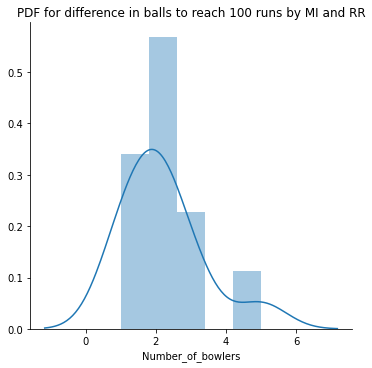

Median : 2.1818181818181817


In [65]:
#But we want only bowlers who taken 2 or more wickets in a match
df_wickets_2ormore = df_no_of_palyers[df_no_of_palyers['Wickets_taken'] > 1]

#Now plotting PDF 
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(df_wickets_2ormore,size=5) \
   .map(sns.distplot, "Number_of_bowlers") \
   .add_legend();

plt.title("PDF for difference in balls to reach 100 runs by MI and RR")
plt.show();

#Printing Median
print("Median :",df_wickets_2ormore['Number_of_bowlers'].mean())

**Conclusion :-**


1.   Value in between 2 to 3 the probability is high and mean is 2.2.
2.   According to above analysis i am predicting 2-3 bowlers will took 2 or more wickets. In given options i am choosing 3-4 becuase 2-3 is not there.



### Q3) How many bowlers in the match from both teams will have economy rate of less than 8? only those bowlers who bowl more than 1 over more be considered?

To calculate economy rate of a bowler we need Runs conceded by bowler and total number of overs bowled by bowler.

Economy_rate = (Runs Conceded / Total number of overs bowled)

Some times bowler won't finish his over but it happens very rarely. I.e why i am going with over column only not balls column.


In [188]:
#Calculating number of runs given by bowler in each match.
#wides,no-balls,penalty runs and batsman runs are go against the bowler cocnceeded runs.
df_bowlers = df_deliveries.groupby(['match_id','bowler'], as_index=False)['batsman_runs','wide_runs','noball_runs','penalty_runs'].sum()
df_bowlers['runs_conceded'] = df_bowlers['batsman_runs'] + df_bowlers['wide_runs'] + df_bowlers['noball_runs'] + df_bowlers['penalty_runs']

#We want only runs conceeded column along with bowler and match_id
df_runs_conceded = df_bowlers[['match_id','bowler','runs_conceded']]

df_runs_conceded.head(3)


,match_id,bowler,runs_conceded
0,1,A Choudhary,55
1,1,A Nehra,42
2,1,B Kumar,27


In [189]:
#Calcualting number of overs bowled by bowler in each match
df_over = df_deliveries.groupby(['match_id','bowler'])['over'].nunique()
df_overs = df_over.to_frame().reset_index()
df_overs.rename(columns={'over':'overs_bowled'}, inplace=True)
df_overs.head(3)

,match_id,bowler,overs_bowled
0,1,A Choudhary,4
1,1,A Nehra,4
2,1,B Kumar,4


In [190]:
#Now we can merge above dataframes 
df_economy_rate = df_runs_conceded.merge(df_overs, how = 'outer', on = ['match_id', 'bowler'])
#Now calcualting economy rate by using above two dataframes
df_economy_rate['economy_rate'] = df_economy_rate['runs_conceded'] / df_economy_rate['overs_bowled']
df_economy_rate.head()

,match_id,bowler,runs_conceded,overs_bowled,economy_rate
0,1,A Choudhary,55,4,13.75
1,1,A Nehra,42,4,10.50
2,1,B Kumar,27,4,6.75
3,1,BCJ Cutting,35,4,8.75
4,1,Bipul Sharma,4,1,4.00




*  I calculated economy rate of all the bowlers in IPL. But i want to see the economy rate of only bowlers who are playing in today match
*   So i am expecting Bumrah,Trent boult, Pattinson, Krunal Pandya and rahul chahar are 5 bowlers from Mumbai team.



*   From RCB team Chahal, Saini, Morris, Washington sunder and Siraj are 5 bowlers who are expected to play in today match.
*   In question clearly mentioned that bowler has to bowl more than 1 over. I.e also i am taking into consideration.









In [191]:
#Filtering current RCB and MI bowlers and they have to bowl more than 1 over.
df_economy_rate_RCBMI = df_economy_rate[((df_economy_rate['bowler'] == 'YS Chahal') | (df_economy_rate['bowler'] == 'CH Morris') |
                                        (df_economy_rate['bowler'] == 'Washington Sundar') | (df_economy_rate['bowler'] == 'N Saini') |
                                        (df_economy_rate['bowler'] == 'Mohammed Siraj') | (df_economy_rate['bowler'] == 'RD Chahar') |
                                        (df_economy_rate['bowler'] == 'JJ Bumrah') | (df_economy_rate['bowler'] == 'TA Boult') |
                                        (df_economy_rate['bowler'] == 'KH Pandya') | (df_economy_rate['bowler'] == 'JL Pattinson')) &
                                        (df_economy_rate['overs_bowled'] > 1)]

df_economy_rate_RCBMI.head()                                  

,match_id,bowler,runs_conceded,overs_bowled,economy_rate
13,1,YS Chahal,22,4,5.50
20,2,JJ Bumrah,29,4,7.25
22,2,KH Pandya,21,2,10.50
36,3,TA Boult,40,4,10.00
46,4,RD Chahar,32,4,8.00


Text(0, 0.5, 'Density')

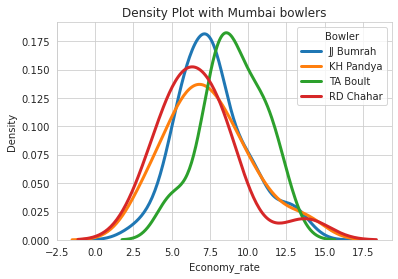

In [132]:
# List of 4 Mumbai bowlers who are playing today actually pattinson data is not there i.e why 4 bowlers only.
MI_bowlers = ['JJ Bumrah', 'KH Pandya','TA Boult','RD Chahar']
# Iterate through the 4 bowlers
for bowler in MI_bowlers:
    # Subset to the bowler
    subset = df_economy_rate_RCBMI[df_economy_rate_RCBMI['bowler'] == bowler]
    
    # Draw the density plot
    sns.distplot(subset['economy_rate'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = bowler)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Bowler')
plt.title('Density Plot with Mumbai bowlers')
plt.xlabel('Economy_rate')
plt.ylabel('Density')




1.   For Bumrah and Krunal pandya economy rate is mostly lies between 6 to 8.
2.   For trent boult economy rate is mostly greater than 7.5 and Rhaul chahar economy rate lies between 5 to 7.



Text(0, 0.5, 'Density')

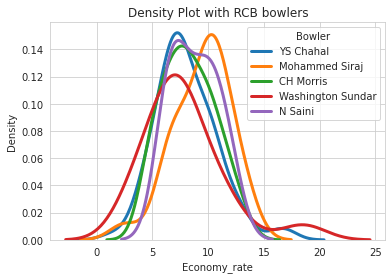

In [133]:
# List of 5 RCB bowlers who are playing today
RCB_bowlers = ['YS Chahal', 'Mohammed Siraj','CH Morris', 'Washington Sundar', 'N Saini']

# Iterate through the 5 RCB bowlers
for bowler in RCB_bowlers:
    # Subset to the bowler
    subset = df_economy_rate_RCBMI[df_economy_rate_RCBMI['bowler'] == bowler]
    
    # Draw the density plot
    sns.distplot(subset['economy_rate'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = bowler)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Bowler')
plt.title('Density Plot with RCB bowlers')
plt.xlabel('Economy_rate')
plt.ylabel('Density')



1.   For Chahal at economy rate = 7 the density is very high mohmmad siraj economy rate is alomost greater than 8 in every match
2.  Morris economy_rate = 8 the density is high, Navadeep saini economy is changing drastically form match to match it is not constant.


3.   According to above plots, I think washignton sunder was most economical bowler almost in every match it is less than 6.






So according to above analysis Mohmmad siraj, Saini, Boult and Morris will have more than 8 economy rate most of the matches.

I am predicting atleast 4 bowlers will have economy rate less than 8 in today match.

### Q4) How many batsman in the match from both teams will have a strike rate more than 130 and hit more than 3 boundaries? only thos batsman who play more than 10 balls will be considered.

In [158]:
df_MIvsRCB = df_deliveries[((df_deliveries['batting_team'] == 'Royal Challengers Bangalore') & (df_deliveries['bowling_team'] == 'Mumbai Indians')) |
                           ((df_deliveries['batting_team'] == 'Mumbai Indians') & (df_deliveries['bowling_team'] == 'Royal Challengers Bangalore'))]

#Calcualting number of runs scored by each batsman in every MI vs RCB match  
df_runs = df_MIvsRCB.groupby(['match_id','batsman'])['batsman_runs'].sum()
df_runs = df_runs.to_frame().reset_index()

#Calcualting number of balls faced by each batsman in every MI vs RCB match  
df_MIvsRCB_ballsfaced = df_MIvsRCB[(df_MIvsRCB['wide_runs'] == 0) & (df_MIvsRCB['noball_runs'] == 0)]
df_balls_faced = df_MIvsRCB_ballsfaced.groupby(['match_id','batsman'])['ball'].count()
df_balls_faced = df_balls_faced.to_frame().reset_index()
df_balls_faced.rename(columns={'ball':'balls_faced'}, inplace = True)

#Calculating hwo many boundaries they scored
df_boundaries = df_MIvsRCB[(df_MIvsRCB['batsman_runs'] == 4) | (df_MIvsRCB['batsman_runs'] == 6)]
df_boundaries = df_boundaries.groupby(['match_id','batsman'])['batsman_runs'].count()
df_boundaries = df_boundaries.to_frame().reset_index()
df_boundaries.rename(columns={'batsman_runs':'no_of_boundaries'}, inplace = True)

print(df_runs.head(2))
print("\n")
print(df_balls_faced.head(2))
print('\n')
print(df_boundaries.head(2))


   match_id         batsman  batsman_runs
0        12  AB de Villiers            19
1        12        CH Gayle            22


   match_id         batsman  balls_faced
0        12  AB de Villiers           21
1        12        CH Gayle           27


   match_id         batsman  no_of_boundaries
0        12  AB de Villiers                 1
1        12        CH Gayle                 3


In [159]:
#Now we can merge above three dataframes on match id and batsman
df_economy_rate = df_runs.merge(df_balls_faced, how = 'outer', on = ['match_id', 'batsman'])
df_economy_rate = df_economy_rate.merge(df_boundaries, how = 'outer', on = ['match_id', 'batsman'])

#Now calculating Strike rate of every batsman in each match
df_economy_rate['strike_rate'] = round(((df_economy_rate['batsman_runs'] / df_economy_rate['balls_faced']) * 100),2)
df_economy_rate.head()

,match_id,batsman,batsman_runs,balls_faced,no_of_boundaries,strike_rate
0,12,AB de Villiers,19,21.0,1.0,90.48
1,12,CH Gayle,22,27.0,3.0,81.48
2,12,HH Pandya,9,4.0,1.0,225.00
3,12,JC Buttler,2,5.0,NaN,40.00
4,12,KA Pollard,70,47.0,8.0,148.94


According to question we have take only plyers who faced more than 10 balls and has strike rate  greater than 130 and number of boundaries is more than 3. 

In [160]:
#Filtering players with balls_faced > 10, strike rate>130 and boundaries > 3

df_players = df_economy_rate[(df_economy_rate['strike_rate'] > 130) & (df_economy_rate['no_of_boundaries'] > 3) &
                             (df_economy_rate['balls_faced'] > 10)]

df_players.head()                             

,match_id,batsman,batsman_runs,balls_faced,no_of_boundaries,strike_rate
4,12,KA Pollard,70,47.0,8.0,148.94
14,12,V Kohli,62,47.0,7.0,131.91
15,37,AB de Villiers,43,27.0,6.0,159.26
18,37,JC Buttler,33,21.0,5.0,157.14
25,37,P Negi,35,23.0,4.0,152.17


In [174]:
#Now calculating how many matches they played against each other
no_of_matches_played = df_MIvsRCB['match_id'].nunique()
print("Number of matches played by MI and RCB against each other is :", no_of_matches_played,"\n")

#Now calculating how many batsman has statisfies given condition in each match
no_of_palyers_satisfies_condn = df_players['strike_rate'].count()
print("Number players has strike rate above 130, ball faced is >10 and number of boundaries is >3 is :",no_of_palyers_satisfies_condn,"\n")

avg = no_of_palyers_satisfies_condn/no_of_matches_played
print("average no_of players has statisfies given condition is : ",int(avg))

Number of matches played by MI and RCB against each other is : 25 

Number players has strike rate above 130, ball faced is >10 and number of boundaries is >3 is : 78 

average no_of players has statisfies given condition is :  3


**Conclusion :-**



1.   So according to above analysis 78 players has strike rate above 30 and they faced more than 10 balls and they hit more than 3 bondaries  in 25 matches between Mumbai abd RCB.
2.   So from above analysis i can say atleast 3 batsman can statisifies given conditions.

I am predicting in today match also more than 3 batsman i.e in given options 3-5 batsman has strike rate above 130, boundaries > 3 and balls faced is greater than 10.



### Q5) How many runs more or less will MI score in the first 6 overs as compared to RCB?

In [176]:
#First filtering MI vs RCB matches
df_MIRCB = df_deliveries[((df_deliveries['batting_team'] == 'Mumbai Indians') & (df_deliveries['bowling_team'] == 'Royal Challengers Bangalore')) |
                         ((df_deliveries['batting_team'] == 'Royal Challengers Bangalore') & (df_deliveries['bowling_team'] == 'Mumbai Indians'))] 

#Calcualting MI runs in first 6 overs in every match against RCB.
df_MI_powerplay = df_MIRCB[(df_MIRCB['batting_team'] == 'Mumbai Indians') & (df_MIRCB['over'] <= 6)]
runs_scored_powerplay = df_MI_powerplay.groupby('match_id')['total_runs'].sum()
df_runscored_PP_MI = runs_scored_powerplay.to_frame().reset_index()
df_runscored_PP_MI.rename(columns = {'total_runs':'runs_scored_poweplay_MI'}, inplace=True)
df_runscored_PP_MI.head(2)

,match_id,runs_scored_poweplay_MI
0,12,21
1,37,55


In [177]:
#Now Calcualting RCB runs in first 6 overs in every match against MI.
df_RCB_powerplay = df_MIRCB[(df_MIRCB['batting_team'] == 'Royal Challengers Bangalore') & (df_MIRCB['over'] <= 6)]
runs_scored_powerplay = df_RCB_powerplay.groupby('match_id')['total_runs'].sum()
df_runscored_PP_RCB = runs_scored_powerplay.to_frame().reset_index()
df_runscored_PP_RCB.rename(columns = {'total_runs':'runs_scored_poweplay_RCB'}, inplace=True)
df_runscored_PP_RCB.head(2)

,match_id,runs_scored_poweplay_RCB
0,12,41
1,37,52


In [180]:
#Joining above two dataframes by match_id
df_MIRCB_powerplay = pd.merge(df_runscored_PP_MI, df_runscored_PP_RCB, left_on='match_id',right_on='match_id', how='outer')

#Taking difference in runs for each match in Powerplay(PP)
df_MIRCB_powerplay['difference_in_runs'] = abs(df_MIRCB_powerplay['runs_scored_poweplay_MI'] - df_MIRCB_powerplay['runs_scored_poweplay_RCB'])
df_MIRCB_powerplay.head(3)

,match_id,runs_scored_poweplay_MI,runs_scored_poweplay_RCB,difference_in_runs
0,12,21,41,20
1,37,55,52,3
2,63,47,40,7


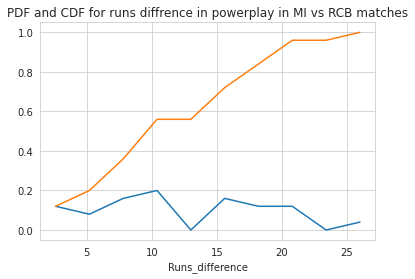

count    25.000000
mean     10.920000
std       6.670332
min       0.000000
25%       7.000000
50%      10.000000
75%      16.000000
max      26.000000
Name: difference_in_runs, dtype: float64


In [182]:
import numpy as np
leg = ["PDF", "CDF"]
counts, bin_edges = np.histogram(df_MIRCB_powerplay['difference_in_runs'], bins=10,
                                density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("PDF and CDF for runs diffrence in powerplay in MI vs RCB matches")
plt.xlabel('Runs_difference')
plt.show();

print(df_MIRCB_powerplay['difference_in_runs'].describe())



1.  According to above CDF plot i can say 70% of the points are less than 15. That means in 70% of matches runs difference is less than 15.  
2.   Probability is very high fo runs difference 8-11'

So by using above analysis , i am predicting runs diffrence in powerplay is lies between 6-14.

